# Sports or Politics Classification

## Importing Data and Handling Errors

In [2]:
import pandas as pd

data1 = pd.read_csv("C:/Users/sivap/Downloads/NLU/train.csv") # dataset 1 (tweets related sports and politics)
data2 = pd.read_csv("C:/Users/sivap/Downloads/NLU/BBC News Train.csv") # dataset 2 (articles related to 5 dfferent categories)

In [4]:
data1

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...


In [6]:
data2

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [8]:
# Checking if any missing values exist

print(data1.isnull().sum()) 
data2.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64


ArticleId    0
Text         0
Category     0
dtype: int64

In [10]:
# checking how many categories exist and corresponding sample count 
print(data2['Category'].value_counts()) 

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [12]:
data1 = data1.drop(['TweetId'], axis = 1)  # dropping columns that do not contribute from dataset 1
print(data1.columns)

data2 = data2.drop(['ArticleId'], axis = 1)  # dropping columns that do not contribute from dataset 2
data2 = data2[(data2['Category'] == 'sport') | (data2['Category'] == 'politics')] # only keeping samples with label as either sport or politics

def convert(text): # function to make sure that both datasets have the same label spelling to avoid inconsistencies
    if text == 'sport':
        return 'Sports'  
    else:
        return 'Politics'

data2['Category'] = data2['Category'].apply(convert) # applying on dataset 2
data2 = data2.rename(columns = {'Text' : 'TweetText', 'Category':'Label'}) # renaming columns to make concatenation easy
print(data2.columns)

Index(['Label', 'TweetText'], dtype='object')
Index(['TweetText', 'Label'], dtype='object')


In [14]:
# concatenation of 2 datasets in to 1 dataset.
data = pd.concat([data1,data2]) 
data

,Label,TweetText
0,Politics,'#SecKerry: The value of the @StateDept and @U...
1,Politics,'@rraina1481 I fear so'
2,Sports,'Watch video highlights of the #wwc13 final be...
3,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,Sports,'@cricketfox Always a good thing. Thanks for t...
...,...,...
1472,Politics,kelly trails new discipline power teachers cou...
1473,Sports,dallaglio eyeing lions tour place former engla...
1475,Politics,budget to set scene for election gordon brown ...
1478,Politics,visa row mandarin made sir john the top civil ...


In [16]:
# sample count of each category after concatenation
data['Label'].value_counts() 

Label
Sports      3671
Politics    3474
Name: count, dtype: int64

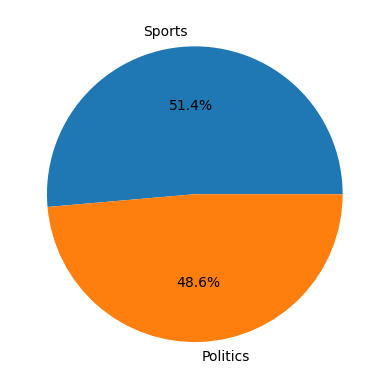

In [18]:
# Visualizing the distribution

import matplotlib.pyplot as plt
plt.pie([data['Label'].value_counts()['Sports'],data['Label'].value_counts()['Politics']], labels = ['Sports','Politics'],autopct='%1.1f%%')
plt.show()

## Data Preprocessing and Feature Representation

In [20]:
import re

# function to process text primarily for tweets
def preprocess(text): 
    t = text.lower() # convert all text to lower case.
    t = re.sub(r'http://\S+',' ',t) # substituting any links with space
    t = re.sub(r'https://\S+',' ',t) 
    t = re.sub(r'@\S+',' ',t) # substitiute any user mention with space 
    t = re.sub(r'[^0-9a-zA-Z]',' ',t) # substitute any non-alphanumeric character with space
    return t

# function to perform label Encoding
def encode(text):  
    if text == 'Sports':
        return 1
    else: 
        return 0

In [21]:
# Apply functions on the data and generate input(X) and target output(y).

X = data['TweetText'].apply(preprocess)
y = data['Label'].apply(encode)

In [22]:
print(X[0] , y[0])

  seckerry  the value of the   and   is measured  not in dollars  but in terms of our deepest american values   0


In [27]:
# import packages to perform training split and feature representation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) # 80-20 split
print(X_train.shape)
print(X_test.shape)

(5716,)
(1429,)


**We are performing the vectorization after train-test split because we do not want any information about the test data to be leaked to the model. If we do it before the split the tf-idf resulting values will also depend on test data so the model might overfit due to leakage of latent information from the test data.**

In [30]:
# Apply Tfidf on data.

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray() # fit_transform
X_test = vectorizer.transform(X_test).toarray() # only transform, no learning takes place.

## Model Training and Predictions

In [32]:
# Import the models

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
# Instantiate the 3 models 

NBC = MultinomialNB()
LR = LogisticRegression()
SVM = SVC()

In [36]:
# Perform training of the data

NBC.fit(X_train,y_train)
LR.fit(X_train,y_train)
SVM.fit(X_train,y_train)

SVC()

In [39]:
# Predict the test data using trained models.

y_pred_nb = NBC.predict(X_test)
y_pred_lr = LR.predict(X_test)
y_pred_svm = SVM.predict(X_test)

## Evaluate the Models

In [42]:
from sklearn.metrics import classification_report, accuracy_score

In [43]:
print("-----Naive Bayes Performance----")
print(classification_report(y_pred_nb,y_test)) # generate a classification report (contains accuracy ,recall, f1-score and precision)
print("Accuracy: ",accuracy_score(y_pred_nb,y_test)) # print the accuracy score

-----Naive Bayes Performance----
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       665
           1       0.97      0.93      0.95       764

    accuracy                           0.94      1429
   macro avg       0.94      0.95      0.94      1429
weighted avg       0.95      0.94      0.94      1429

Accuracy:  0.9447165850244926


In [44]:
print("-----Logistic Regression Performance----")
print(classification_report(y_pred_lr,y_test))
print("Accuracy: ",accuracy_score(y_pred_lr,y_test))

-----Logistic Regression Performance----
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       675
           1       0.95      0.92      0.93       754

    accuracy                           0.93      1429
   macro avg       0.93      0.93      0.93      1429
weighted avg       0.93      0.93      0.93      1429

Accuracy:  0.9321203638908327


In [45]:
print("-----Support Vector Machine Performance----")
print(classification_report(y_pred_svm,y_test))
print("Accuracy: ",accuracy_score(y_pred_svm,y_test))

-----Support Vector Machine Performance----
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       670
           1       0.97      0.93      0.95       759

    accuracy                           0.95      1429
   macro avg       0.95      0.95      0.95      1429
weighted avg       0.95      0.95      0.95      1429

Accuracy:  0.9482155353393982


**Since SVM has achieved the highest accuracy, we will use this model as our classifier to classify text documents.**

In [53]:
import joblib
joblib.dump(SVM, "best_model.pkl") # save the model
joblib.dump(vectorizer, "vectorizer.pkl") # save the tf-idf weights

['vectorizer.pkl']

## Inference using the classifier

In [1]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model = joblib.load("best_model.pkl")  # load saved model
vector = joblib.load("vectorizer.pkl") #load saved tf-idf weights

In [3]:
import re

def preprocess(text): 
    t = text.lower() # convert all text to lower case.
    t = re.sub(r'http://\S+',' ',t) # substituting any links with space
    t = re.sub(r'https://\S+',' ',t) 
    t = re.sub(r'@\S+',' ',t) # substitiute any user mention with space 
    t = re.sub(r'[^0-9a-zA-Z]',' ',t) # substitute any non-alphanumeric character with space
    return t

def make_prediction(text):
    processed_text = preprocess(text) #preprocess text
    vector_txt = vector.transform([processed_text]) #compute tf-idf vectors
    prediction = model.predict(vector_txt.toarray()) # use he model to predict
    return prediction

In [5]:
choice = int(input("Enter 1 to upload a text document, Enter 2 to type text manually: "))

if choice == 1:
    file_path = input("Enter file path: ")

    if not file_path:
        print("No file selected.")
        exit()
        
    else:
        with open(file_path, "r", encoding="utf-8") as file:  # open the file
            text = file.read()  # read text

elif choice == 2:
    text = input("Enter Text manually: ")

else:
    print("Invalid Choice")

Enter 1 to upload a text document, Enter 2 to type text manually:  1
Enter file path:  doc1.txt


In [7]:
prediction = make_prediction(text)    # pass the text to the prediction pipeline
if prediction == 1:
    print("Sports")
else:
    print("Politics")

Sports
